✅ Setup EDA selesai
✅ MLflow tracking URI: file:./mlruns
✅ MLflow experiment: Mood_Classification_EDA

📊 Informasi Dataset:
   Total samples: 200
   Kolom: ['id', 'lyrics', 'mood', 'title', 'artist']
   Missing values: 0
✅ Data cleaning selesai

Contoh hasil cleaning:
Original: You know I don't believe in ghosts Or letting people close I'm good at letting go You kiss my lips u ...
Cleaned : you know i dont believe in ghosts or letting people close im good at letting go you kiss my lips unt ...


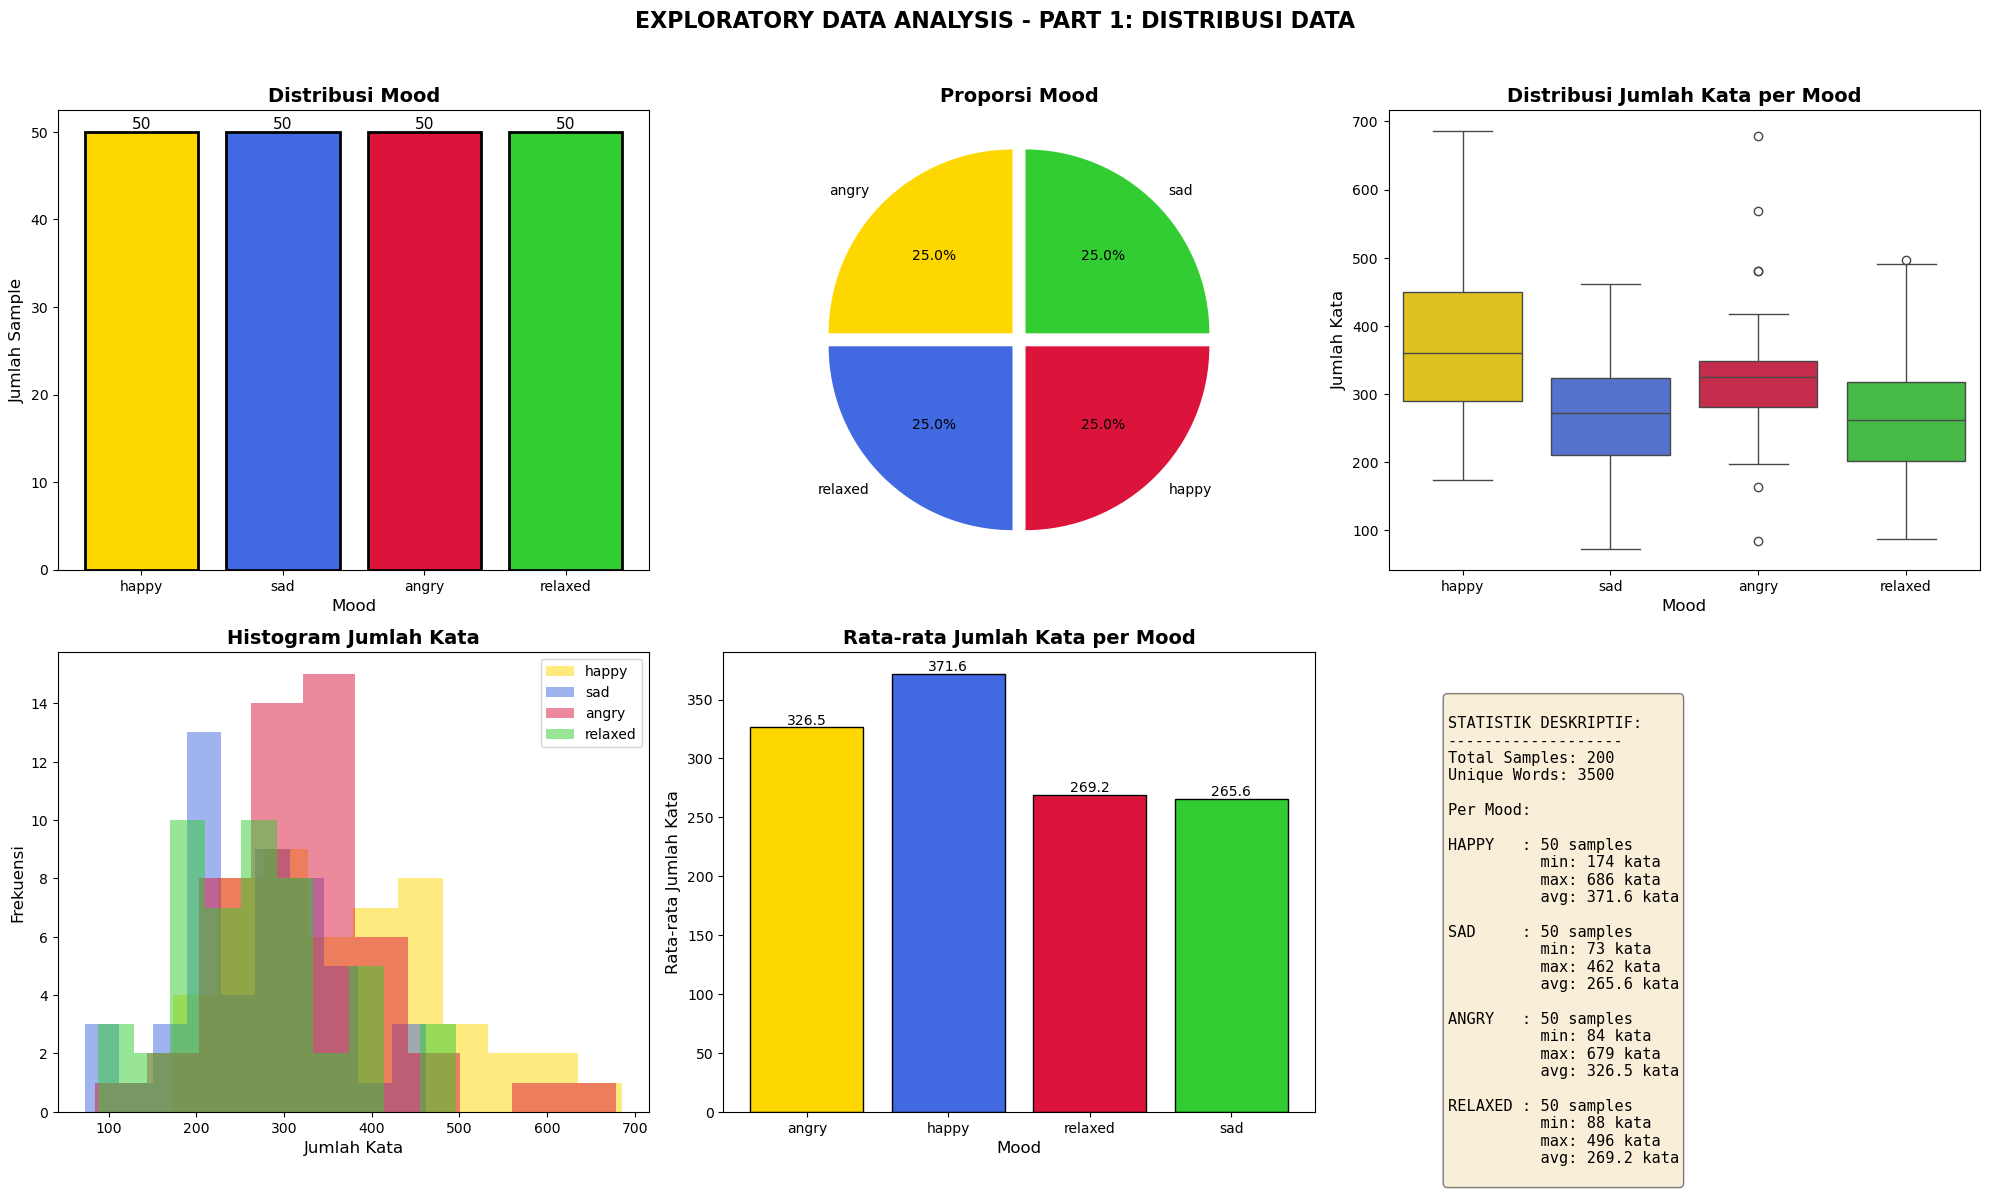

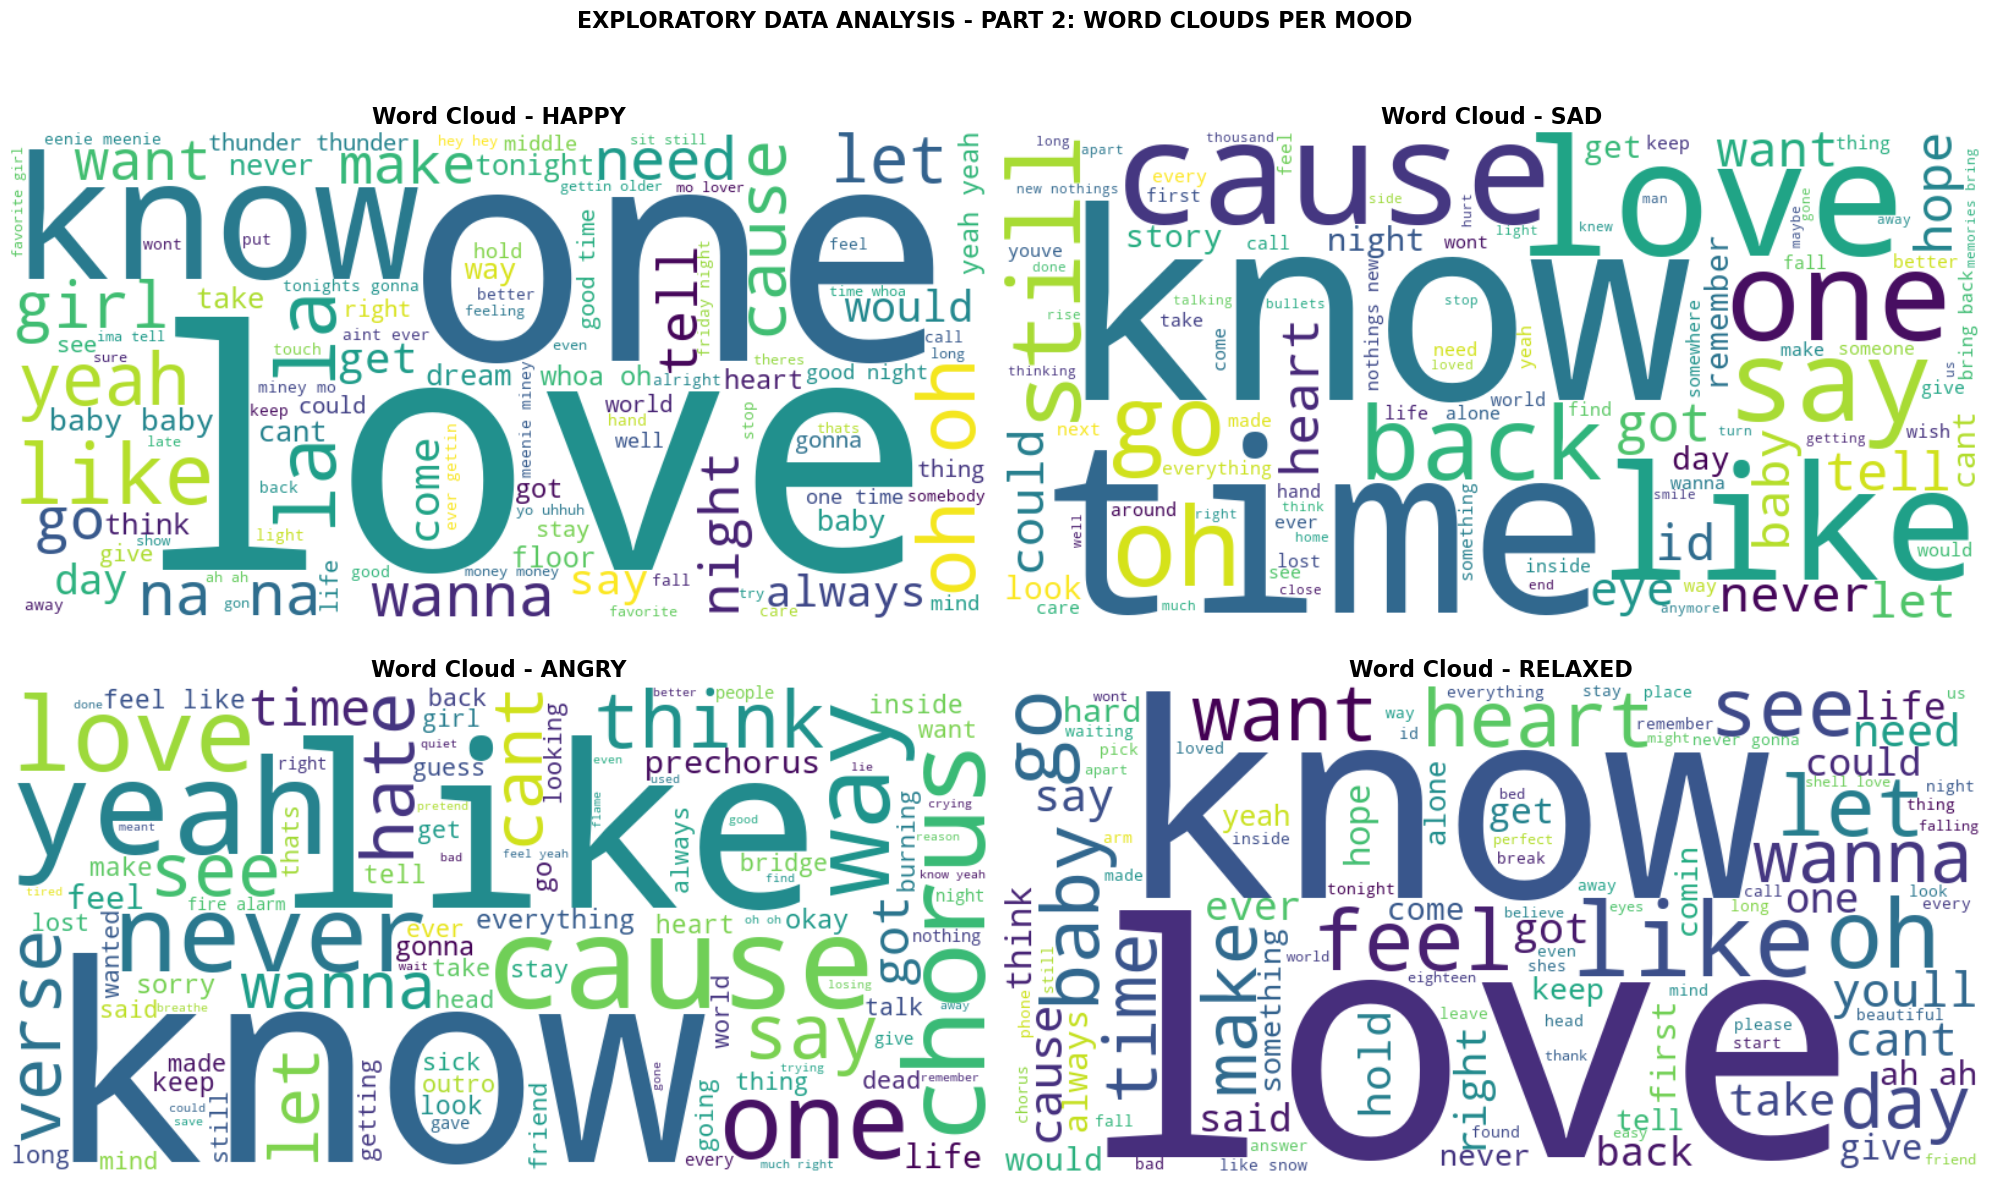

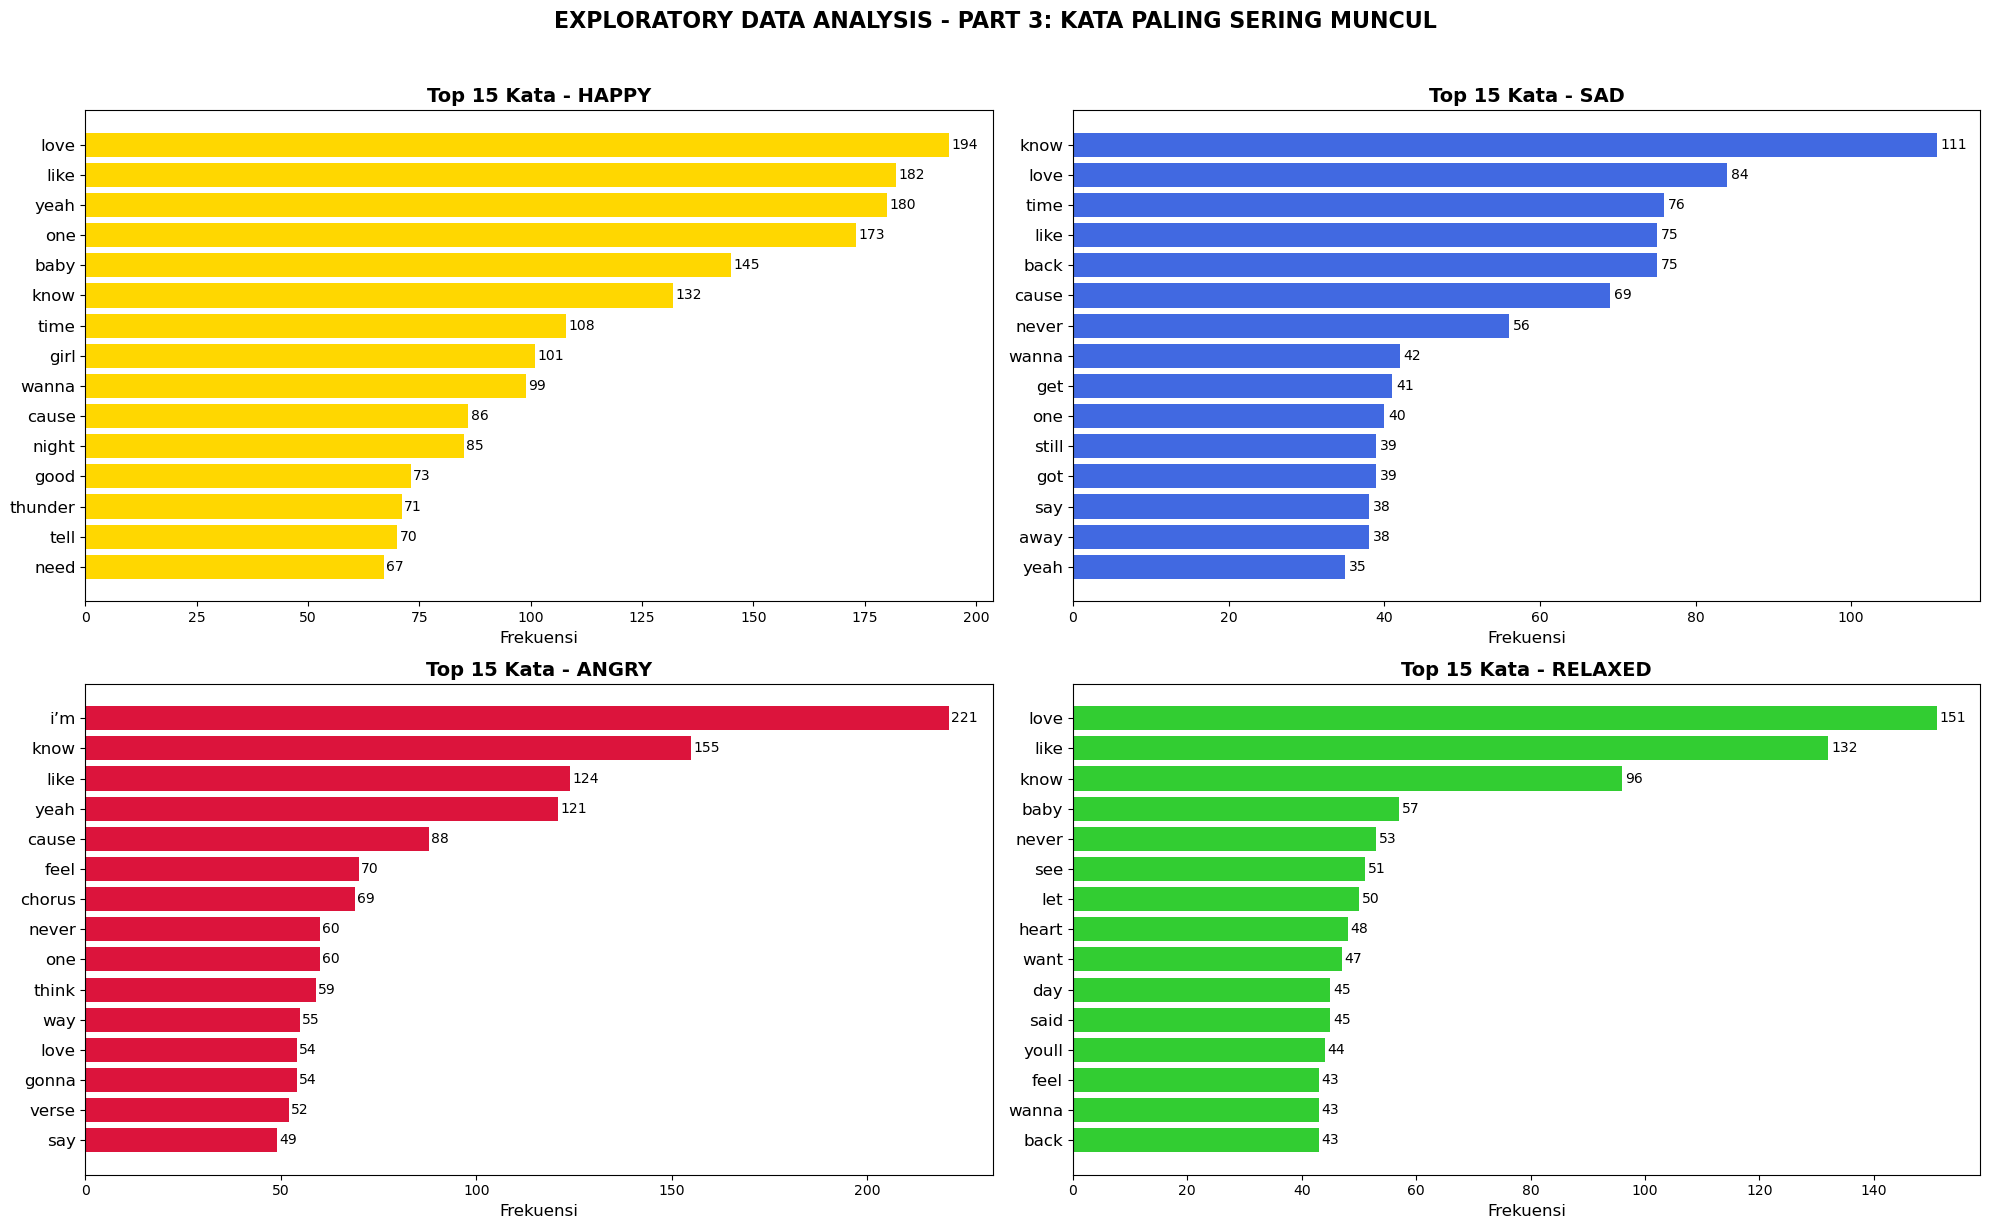


RINGKASAN EDA

📊 Statistik Dataset:
   Total Samples: 200
   Total Unique Words: 3500
   Rata-rata Kata per Lirik: 308.2
   Class Imbalance Ratio: 1.00

📈 Distribusi Mood:
   angry   :  50 samples ( 25.0%)
   relaxed :  50 samples ( 25.0%)
   happy   :  50 samples ( 25.0%)
   sad     :  50 samples ( 25.0%)

📊 Statistik per Mood:

   HAPPY:
      Jumlah sample: 50
      Rata-rata kata: 371.6
      Min kata: 174
      Max kata: 686

   SAD:
      Jumlah sample: 50
      Rata-rata kata: 265.6
      Min kata: 73
      Max kata: 462

   ANGRY:
      Jumlah sample: 50
      Rata-rata kata: 326.5
      Min kata: 84
      Max kata: 679

   RELAXED:
      Jumlah sample: 50
      Rata-rata kata: 269.2
      Min kata: 88
      Max kata: 496

✅ EDA selesai! Hasil tersimpan di MLflow dan file lokal.
   Untuk melihat hasil MLflow: mlflow ui
✅ Data processed disimpan ke 'processed_lyrics.csv'


In [2]:
# CELL 1: Setup dan Import Library untuk EDA
"""
# 📊 EDA ANALYSIS - KLASIFIKASI MOOD LAGU
## File 1: Exploratory Data Analysis
## Dataset: Lirik Lagu (4 Mood: happy, sad, angry, relaxed)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import re
import string
from collections import Counter
import json
from datetime import datetime
warnings.filterwarnings('ignore')

# MLflow untuk tracking EDA
import mlflow
import mlflow.sklearn

# NLTK untuk text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# WordCloud
from wordcloud import WordCloud

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Setup MLflow
mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("Mood_Classification_EDA")

# Setup visualisasi
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("✅ Setup EDA selesai")
print(f"✅ MLflow tracking URI: {mlflow.get_tracking_uri()}")
print(f"✅ MLflow experiment: Mood_Classification_EDA")

# CELL 2: Load Dataset
"""
## 📥 LOAD DATASET
"""

# Load data
df = pd.read_excel('lyrics.xlsx')

print(f"\n📊 Informasi Dataset:")
print(f"   Total samples: {len(df)}")
print(f"   Kolom: {df.columns.tolist()}")
print(f"   Missing values: {df.isnull().sum().sum()}")
df.head()

# CELL 3: Data Cleaning untuk EDA
"""
## 🧹 DATA CLEANING (untuk EDA)
"""

def clean_text_eda(text):
    """Fungsi untuk membersihkan teks (versi EDA)"""
    if pd.isna(text):
        return ""
    
    text = str(text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(text.split())
    return text

# Terapkan cleaning
df['lyrics_clean'] = df['lyrics'].apply(clean_text_eda)

# Tambah kolom analisis
df['char_count'] = df['lyrics_clean'].str.len()
df['word_count'] = df['lyrics_clean'].str.split().str.len()

print("✅ Data cleaning selesai")
print("\nContoh hasil cleaning:")
print("Original:", df['lyrics'].iloc[0][:100], "...")
print("Cleaned :", df['lyrics_clean'].iloc[0][:100], "...")

# CELL 4: EDA Part 1 - Distribusi Data
"""
## 📈 EDA PART 1: DISTRIBUSI DATA
"""

# Setup stopwords untuk visualisasi
stop_words = set(stopwords.words('english'))
stop_words.update(['im', 'dont', 'youre', 'ive', 'ill', 'the', 'and', 'to', 'a'])

# Setup figure
fig = plt.figure(figsize=(20, 12))

# 1. Distribusi Mood (Bar Chart)
plt.subplot(2, 3, 1)
mood_counts = df['mood'].value_counts()
mood_order = ['happy', 'sad', 'angry', 'relaxed']
colors = ['#FFD700', '#4169E1', '#DC143C', '#32CD32']

bars = plt.bar(mood_order, [mood_counts.get(m, 0) for m in mood_order], 
               color=colors, edgecolor='black', linewidth=2)
plt.title('Distribusi Mood', fontsize=14, fontweight='bold')
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Jumlah Sample', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

# 2. Pie Chart Distribusi Mood
plt.subplot(2, 3, 2)
plt.pie(mood_counts.values, labels=mood_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=[0.05]*4)
plt.title('Proporsi Mood', fontsize=14, fontweight='bold')

# 3. Distribusi Panjang Lirik per Mood (Boxplot)
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='mood', y='word_count', order=mood_order, palette=colors)
plt.title('Distribusi Jumlah Kata per Mood', fontsize=14, fontweight='bold')
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Jumlah Kata', fontsize=12)

# 4. Histogram Panjang Lirik
plt.subplot(2, 3, 4)
for i, mood in enumerate(mood_order):
    subset = df[df['mood'] == mood]
    plt.hist(subset['word_count'], alpha=0.5, label=mood, color=colors[i], bins=10)
plt.title('Histogram Jumlah Kata', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Kata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()

# 5. Rata-rata Jumlah Kata per Mood
plt.subplot(2, 3, 5)
mean_words = df.groupby('mood')['word_count'].mean()
bars = plt.bar(mean_words.index, mean_words.values, color=colors, edgecolor='black')
plt.title('Rata-rata Jumlah Kata per Mood', fontsize=14, fontweight='bold')
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Rata-rata Jumlah Kata', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# 6. Statistik Deskriptif
plt.subplot(2, 3, 6)
plt.axis('off')
stats_text = f"""
STATISTIK DESKRIPTIF:
-------------------
Total Samples: {len(df)}
Unique Words: {len(set(' '.join(df['lyrics_clean']).split()))}

Per Mood:
"""
for mood in mood_order:
    mood_df = df[df['mood'] == mood]
    stats_text += f"\n{mood.upper():8}: {len(mood_df)} samples"
    stats_text += f"\n{'':8}  min: {mood_df['word_count'].min():2d} kata"
    stats_text += f"\n{'':8}  max: {mood_df['word_count'].max():2d} kata"
    stats_text += f"\n{'':8}  avg: {mood_df['word_count'].mean():5.1f} kata\n"

plt.text(0.1, 0.9, stats_text, fontsize=11, verticalalignment='top',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('EXPLORATORY DATA ANALYSIS - PART 1: DISTRIBUSI DATA', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('eda_part1_distribusi.png', dpi=150, bbox_inches='tight')
plt.show()

# CELL 5: EDA Part 2 - Word Clouds
"""
## ☁️ EDA PART 2: WORD CLOUDS PER MOOD
"""

# Buat word cloud per mood
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
moods = ['happy', 'sad', 'angry', 'relaxed']

for idx, mood in enumerate(moods):
    row = idx // 2
    col = idx % 2
    
    # Gabungkan semua teks untuk mood tertentu
    mood_text = ' '.join(df[df['mood'] == mood]['lyrics_clean'])
    
    # Buat word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100,
        stopwords=stop_words,
        contour_width=1,
        contour_color='steelblue'
    ).generate(mood_text)
    
    # Plot
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].set_title(f'Word Cloud - {mood.upper()}', fontsize=16, fontweight='bold')
    axes[row, col].axis('off')

plt.suptitle('EXPLORATORY DATA ANALYSIS - PART 2: WORD CLOUDS PER MOOD', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('eda_part2_wordclouds.png', dpi=150, bbox_inches='tight')
plt.show()

# CELL 6: EDA Part 3 - Top Words Analysis
"""
## 🔝 EDA PART 3: KATA PALING SERING MUNCUL
"""

def get_top_words(texts, n=15):
    """Mendapatkan n kata paling sering"""
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    
    # Filter stopwords
    for word in list(word_counts.keys()):
        if word in stop_words or len(word) < 3:
            del word_counts[word]
    
    return word_counts.most_common(n)

# Plot top words per mood
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for idx, mood in enumerate(moods):
    row = idx // 2
    col = idx % 2
    
    mood_texts = df[df['mood'] == mood]['lyrics_clean']
    top_words = get_top_words(mood_texts)
    
    words, counts = zip(*top_words)
    
    # Horizontal bar chart
    y_pos = range(len(words))
    axes[row, col].barh(y_pos, counts, color=colors[idx])
    axes[row, col].set_yticks(y_pos)
    axes[row, col].set_yticklabels(words, fontsize=12)
    axes[row, col].invert_yaxis()
    axes[row, col].set_xlabel('Frekuensi', fontsize=12)
    axes[row, col].set_title(f'Top 15 Kata - {mood.upper()}', fontsize=14, fontweight='bold')
    
    # Tambah nilai
    for i, (word, count) in enumerate(top_words):
        axes[row, col].text(count + 0.5, i, str(count), va='center', fontsize=10)

plt.suptitle('EXPLORATORY DATA ANALYSIS - PART 3: KATA PALING SERING MUNCUL', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('eda_part3_top_words.png', dpi=150, bbox_inches='tight')
plt.show()

# CELL 7: EDA Summary dan Save Results
"""
## 📊 EDA SUMMARY DAN SAVE RESULTS
"""

# Hitung metrik EDA
eda_metrics = {
    'total_samples': len(df),
    'total_unique_words': len(set(' '.join(df['lyrics_clean']).split())),
    'avg_words_per_lyric': float(df['word_count'].mean()),
    'class_distribution': df['mood'].value_counts().to_dict(),
    'class_imbalance_ratio': float(df['mood'].value_counts().max() / df['mood'].value_counts().min())
}

# Hitung statistik per mood
mood_stats = {}
for mood in moods:
    mood_df = df[df['mood'] == mood]
    mood_stats[mood] = {
        'count': len(mood_df),
        'avg_words': float(mood_df['word_count'].mean()),
        'min_words': int(mood_df['word_count'].min()),
        'max_words': int(mood_df['word_count'].max())
    }

# Simpan ke MLflow
with mlflow.start_run(run_name="EDA_Analysis"):
    # Log metrics
    mlflow.log_metrics({
        'total_samples': eda_metrics['total_samples'],
        'total_unique_words': eda_metrics['total_unique_words'],
        'avg_words_per_lyric': eda_metrics['avg_words_per_lyric'],
        'class_imbalance_ratio': eda_metrics['class_imbalance_ratio']
    })
    
    # Log params (class distribution)
    for mood, count in eda_metrics['class_distribution'].items():
        mlflow.log_param(f"count_{mood}", count)
    
    # Log artifacts
    mlflow.log_artifact('eda_part1_distribusi.png')
    mlflow.log_artifact('eda_part2_wordclouds.png')
    mlflow.log_artifact('eda_part3_top_words.png')
    
    # Simpan stats ke file JSON
    with open('eda_summary.json', 'w') as f:
        json.dump({
            'eda_metrics': eda_metrics,
            'mood_stats': mood_stats,
            'timestamp': datetime.now().isoformat()
        }, f, indent=2)
    
    mlflow.log_artifact('eda_summary.json')

print("\n" + "="*60)
print("RINGKASAN EDA")
print("="*60)

print(f"\n📊 Statistik Dataset:")
print(f"   Total Samples: {eda_metrics['total_samples']}")
print(f"   Total Unique Words: {eda_metrics['total_unique_words']}")
print(f"   Rata-rata Kata per Lirik: {eda_metrics['avg_words_per_lyric']:.1f}")
print(f"   Class Imbalance Ratio: {eda_metrics['class_imbalance_ratio']:.2f}")

print(f"\n📈 Distribusi Mood:")
for mood, count in eda_metrics['class_distribution'].items():
    pct = (count/eda_metrics['total_samples'])*100
    print(f"   {mood:8}: {count:3} samples ({pct:5.1f}%)")

print(f"\n📊 Statistik per Mood:")
for mood, stats in mood_stats.items():
    print(f"\n   {mood.upper()}:")
    print(f"      Jumlah sample: {stats['count']}")
    print(f"      Rata-rata kata: {stats['avg_words']:.1f}")
    print(f"      Min kata: {stats['min_words']}")
    print(f"      Max kata: {stats['max_words']}")

print("\n✅ EDA selesai! Hasil tersimpan di MLflow dan file lokal.")
print(f"   Untuk melihat hasil MLflow: mlflow ui")

# CELL 8: Save Processed Data untuk Modelling
"""
## 💾 SAVE PROCESSED DATA UNTUK MODELLING
"""

# Simpan dataframe yang sudah diproses untuk digunakan di file modelling
df.to_csv('processed_lyrics.csv', index=False)
print("✅ Data processed disimpan ke 'processed_lyrics.csv'")